# EU

In [1]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"C:file.csv")
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


# Add Market Capitalization Category

In [5]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap


# GAM to predict ESG

In [7]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Fixed penalty for all terms
fixed_lambda = 0.001

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model with all interactions and fixed penalties
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # EPS, ROA, ROE
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Country, Industry, MCap

        # Categorical × Categorical
        te(3, 4, lam=fixed_lambda) +
        te(3, 5, lam=fixed_lambda) +
        te(4, 5, lam=fixed_lambda) +

        # Numeric × Numeric
        te(0, 1, lam=fixed_lambda) +
        te(0, 2, lam=fixed_lambda) +
        te(1, 2, lam=fixed_lambda) +

        # Numeric × Categorical
        te(0, 3, lam=fixed_lambda) +
        te(0, 4, lam=fixed_lambda) +
        te(0, 5, lam=fixed_lambda) +
        te(1, 3, lam=fixed_lambda) +
        te(1, 4, lam=fixed_lambda) +
        te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) +
        te(2, 4, lam=fixed_lambda) +
        te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()


GAM Summary for Target: ESG_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -37222.3992
Number of Samples:                         6296 AIC:                                             75449.936
                                                AICc:                                           75537.3183
                                                GCV:                                              171.3132
                                                Scale:                                            146.9365
                                                Pseudo R-Squared:                                   0.5985
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Env_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39634.4092
Number of Samples:                         6296 AIC:                                             80273.956
                                                AICc:                                           80361.3383
                                                GCV:                                              251.5381
                                                Scale:                                            215.7459
                                                Pseudo R-Squared:                                   0.6532
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Soc_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -39521.9504
Number of Samples:                         6296 AIC:                                            80049.0384
                                                AICc:                                           80136.4207
                                                GCV:                                              247.0755
                                                Scale:                                            211.9184
                                                Pseudo R-Squared:                                   0.5687
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Gov_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -40788.1318
Number of Samples:                         6296 AIC:                                            82581.4013
                                                AICc:                                           82668.7836
                                                GCV:                                              302.2333
                                                Scale:                                            259.2275
                                                Pseudo R-Squared:                                   0.4843
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ESG_Comb_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                -38066.5217
Number of Samples:                         6296 AIC:                                            77138.1811
                                                AICc:                                           77225.5634
                                                GCV:                                              195.9698
                                                Scale:                                            168.0846
                                                Pseudo R-Squared:                                   0.48

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\553325311.py:62: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [9]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=fixed_lambda) + s(1, lam=fixed_lambda) + s(2, lam=fixed_lambda) +  # Numeric terms
        f(3, lam=fixed_lambda) + f(4, lam=fixed_lambda) + f(5, lam=fixed_lambda) +  # Factor terms
        te(3, 4, lam=fixed_lambda) + te(3, 5, lam=fixed_lambda) + te(4, 5, lam=fixed_lambda) +  # Cat × Cat
        te(0, 1, lam=fixed_lambda) + te(0, 2, lam=fixed_lambda) + te(1, 2, lam=fixed_lambda) +  # Num × Num
        te(0, 3, lam=fixed_lambda) + te(0, 4, lam=fixed_lambda) + te(0, 5, lam=fixed_lambda) +  # Num × Cat
        te(1, 3, lam=fixed_lambda) + te(1, 4, lam=fixed_lambda) + te(1, 5, lam=fixed_lambda) +
        te(2, 3, lam=fixed_lambda) + te(2, 4, lam=fixed_lambda) + te(2, 5, lam=fixed_lambda)
    ).fit(X, y)

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")

✅ Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl
✅ Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl
✅ Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl
✅ Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl
✅ Saved model for ESG_Comb_score to saved_gam_models\gam_model_ESG_Comb_score.pkl


# Trade-Off

### for presentation

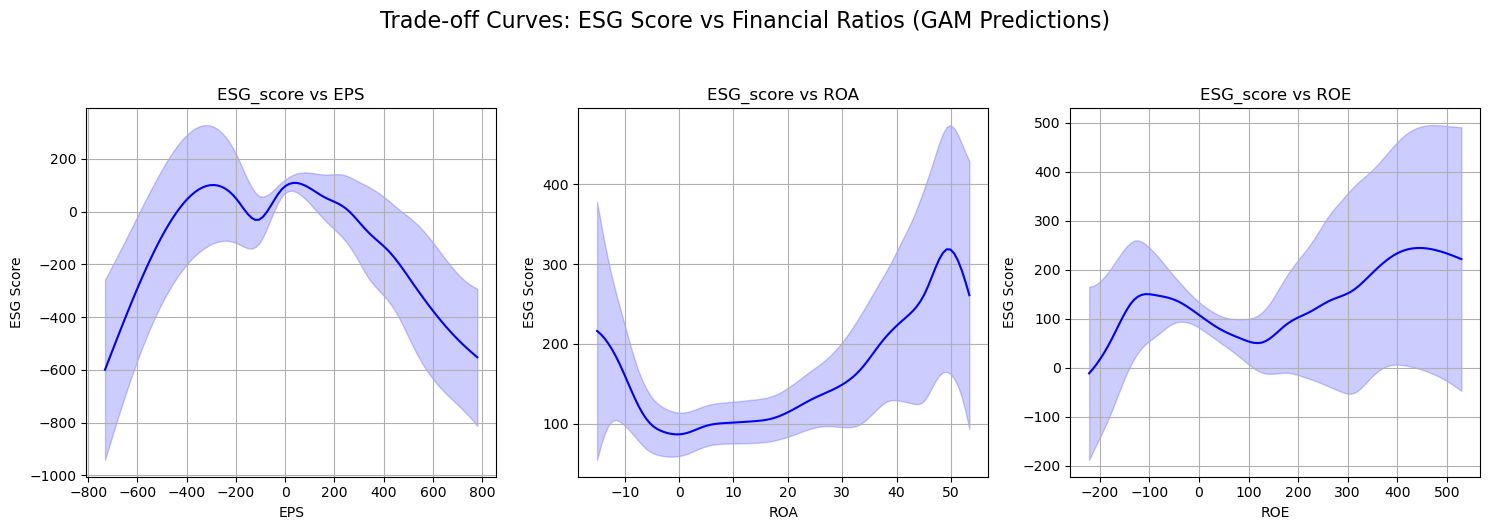

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG target
predictors = ['EPS', 'ROA', 'ROE']
esg_target = 'ESG_score'  # Only one target now

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure (1 row for ESG_score, 3 columns for EPS, ROA, ROE)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex='col')
fig.suptitle('Trade-off Curves: ESG Score vs Financial Ratios (GAM Predictions)', fontsize=16, y=1.05)

# Load the GAM model for ESG_score
model_path = os.path.join(model_dir, f'gam_model_{esg_target}.pkl')
with open(model_path, 'rb') as file_handle:
    gam = pickle.load(file_handle)

# Clean data
df_clean = df.dropna(subset=predictors + [esg_target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

# Reconstruct input feature matrix
X_num = df_clean[predictors].values
X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])

# Get median values
X_baseline = np.median(X_train, axis=0)
feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

# Loop over financial ratios (EPS, ROA, ROE)
for col_idx, fin_ratio in enumerate(predictors):
    idx_fin = feature_indices[fin_ratio]

    # Grid for current financial ratio
    fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
    fin_grid = np.linspace(fin_min, fin_max, 100)

    # Prediction input: vary current ratio, fix all else at median
    X_pred = np.tile(X_baseline, (100, 1))
    X_pred[:, idx_fin] = fin_grid

    # Predict ESG and confidence intervals
    esg_pred = gam.predict(X_pred)
    conf_int = gam.confidence_intervals(X_pred)

    # Plot in subplot
    ax = axes[col_idx]
    ax.plot(fin_grid, esg_pred, label=esg_target, color='blue')
    ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
    ax.set_title(f'{esg_target} vs {fin_ratio}')
    ax.set_xlabel(fin_ratio)
    ax.set_ylabel('ESG Score')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('esg_score_trade_off.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()


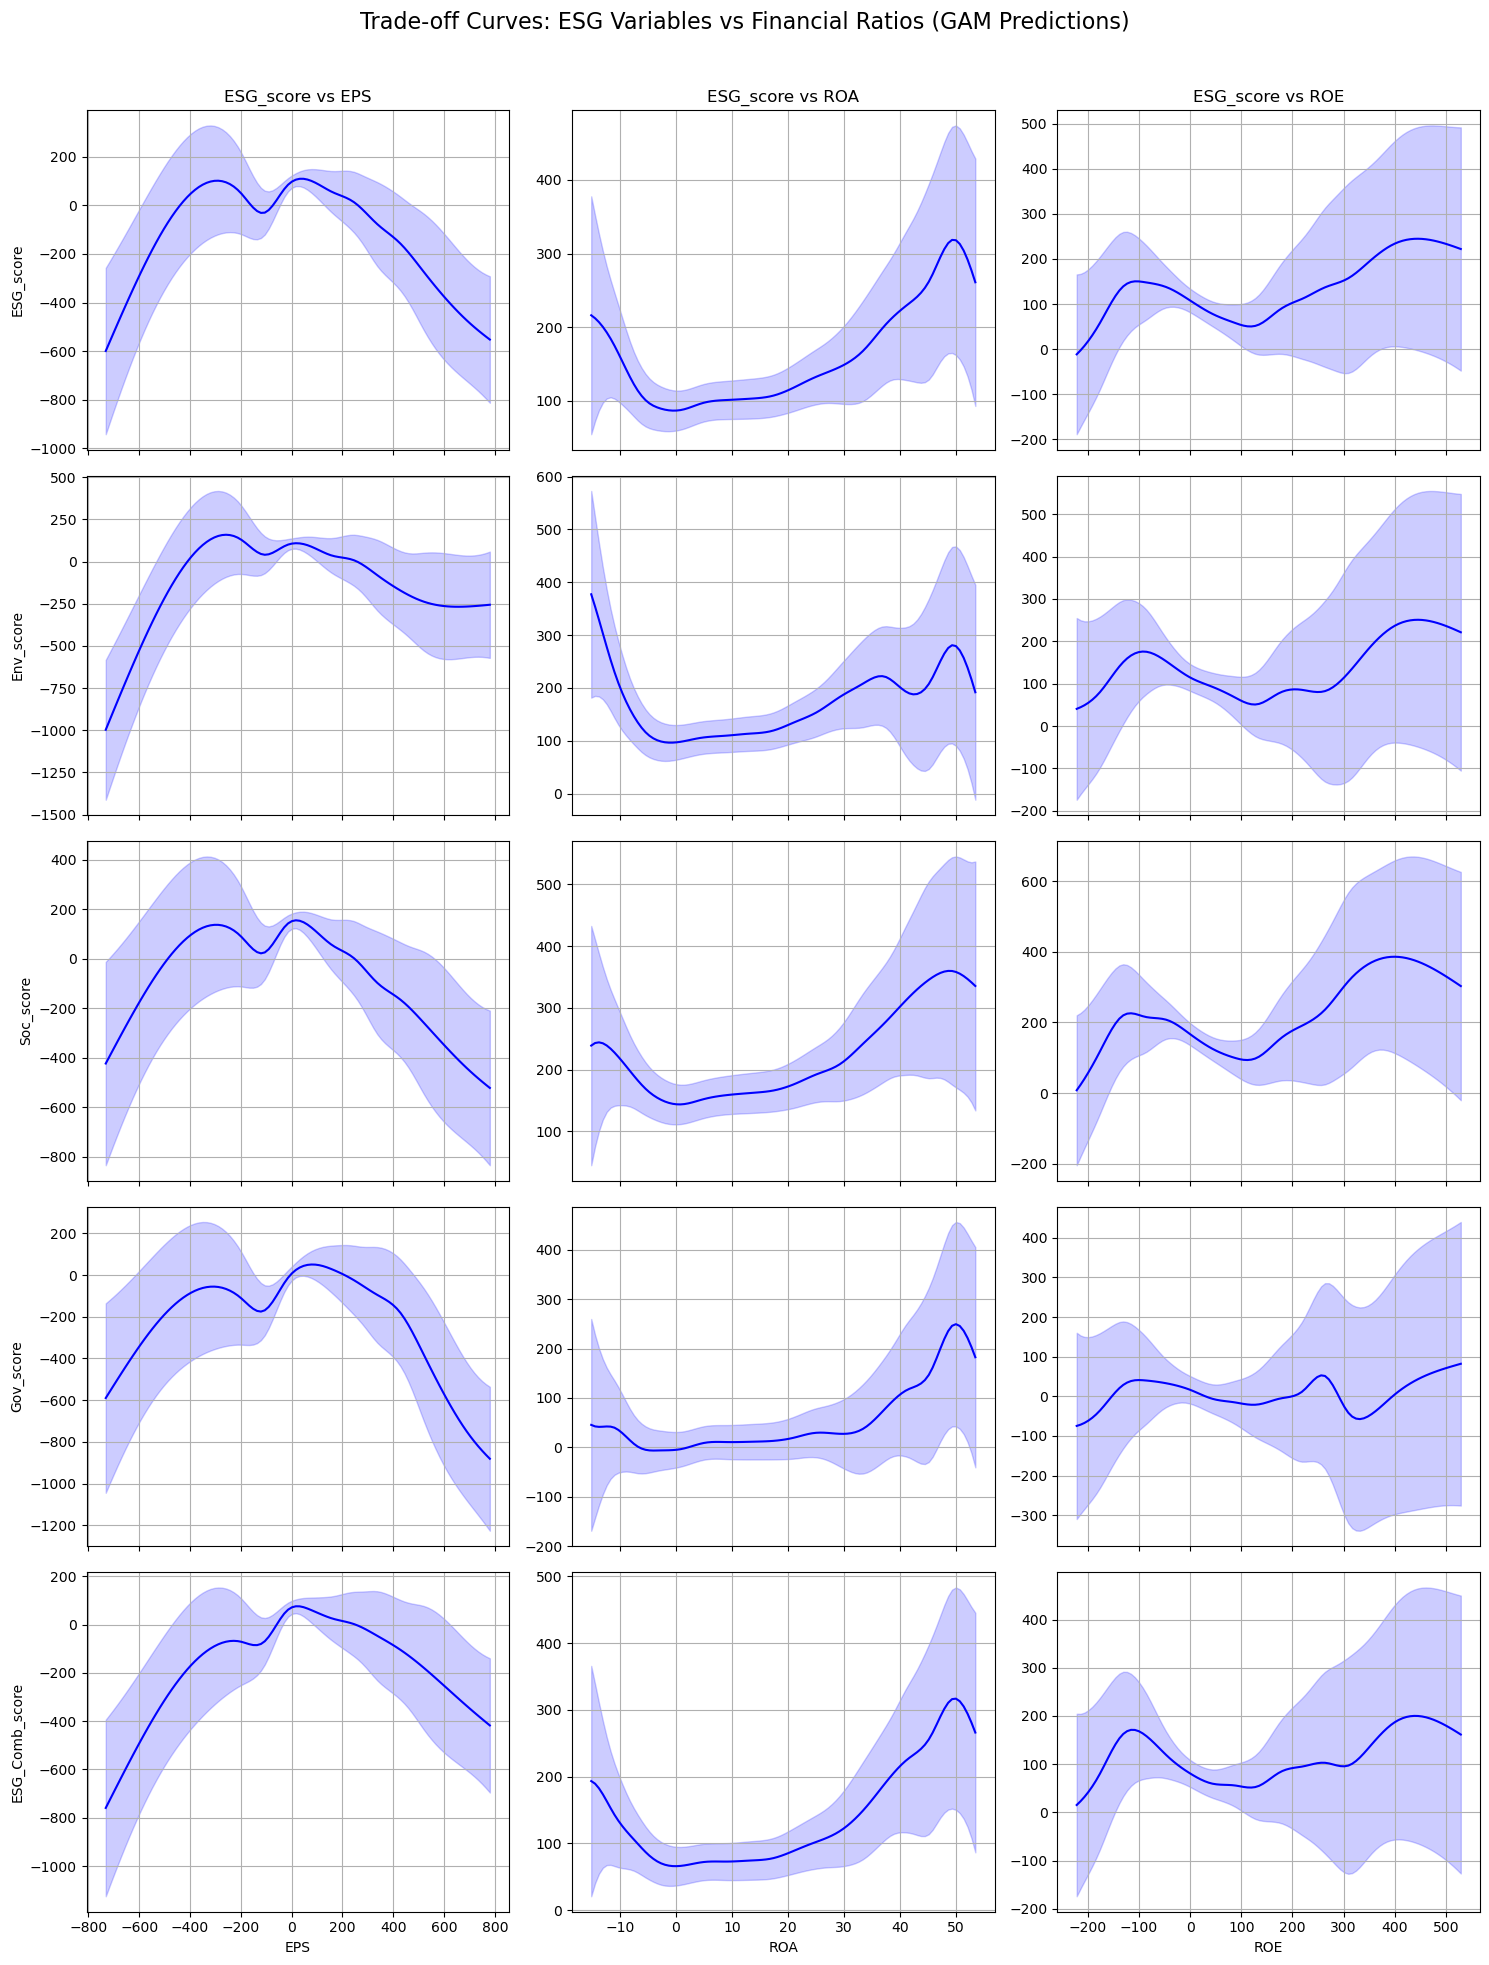

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Reconstruct input feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Get median values
    X_baseline = np.median(X_train, axis=0)
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Grid for current financial ratio
        fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Prediction input: vary current ratio, fix all else at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Predict ESG and confidence intervals
        esg_pred = gam.predict(X_pred)
        conf_int = gam.confidence_intervals(X_pred)

        # Plot in subplot
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=f'{target}', color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
        ax.set_title(f'{target} vs {fin_ratio}' if row_idx == 0 else "")
        if col_idx == 0:
            ax.set_ylabel(f'{target}')
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Adjust layout before adding suptitle
plt.tight_layout()

# Add space for the super title
fig.subplots_adjust(top=0.93)
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16)

# plt.savefig('/path/to/folder/esg_tradeoff_curves.pdf', format='pdf', bbox_inches='tight')

# Show the final plot
plt.show()


### Numerical

In [17]:
import numpy as np

# Load model
target = 'ESG_score'
model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
with open(model_path, 'rb') as f:
    gam = pickle.load(f)

# Clean data
df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

# Construct feature matrix
X_num = df_clean[predictors].values
X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])

# Median baseline
X_baseline = np.median(X_train, axis=0)

# Index of ROE
feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}
idx_roe = feature_indices['ROE']

# Get 1% of ROE (relative to current value or range)
roe_value = X_baseline[idx_roe]
delta = roe_value * 0.01  # 1% change

# Prepare input matrices
X_up = X_baseline.copy()
X_up[idx_roe] += delta
X_down = X_baseline.copy()
X_down[idx_roe] -= delta

# Predict ESG for ROE +/- 1%
esg_up = gam.predict([X_up])[0]
esg_down = gam.predict([X_down])[0]

# Approximate derivative / marginal effect
marginal_effect = (esg_up - esg_down) / (2 * delta)

print(f"Estimated marginal effect of ROE on {target}: {marginal_effect:.4f} ESG points per 1 unit change in ROE")
print(f"At ROE = {roe_value:.4f}, a 1% change in ROE → ~{marginal_effect * delta:.4f} change in ESG_score")


Estimated marginal effect of ROE on ESG_score: -0.7186 ESG points per 1 unit change in ROE
At ROE = 14.1000, a 1% change in ROE → ~-0.1013 change in ESG_score


In [19]:
import numpy as np
import pickle
import os
import pandas as pd

# Define variables
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
model_dir = 'saved_gam_models'

# Prepare clean dataset
df_clean = df.dropna(subset=predictors + esg_targets + ['Country_code', 'Industry_code', 'MCap_code']).copy()
X_num = df_clean[predictors].values
X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])
X_baseline = np.median(X_train, axis=0)

# Index lookup
feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

# Collect results
results = []

for target in esg_targets:
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    for predictor in predictors:
        idx = feature_indices[predictor]
        base_value = X_baseline[idx]
        delta = base_value * 0.01  # 1% change

        # Skip if base_value is 0 to avoid division by zero
        if base_value == 0:
            marginal_effect = np.nan
            esg_change = np.nan
        else:
            X_up = X_baseline.copy()
            X_up[idx] += delta
            X_down = X_baseline.copy()
            X_down[idx] -= delta

            # Predict
            esg_up = gam.predict([X_up])[0]
            esg_down = gam.predict([X_down])[0]

            # Central difference approximation
            marginal_effect = (esg_up - esg_down) / (2 * delta)
            esg_change = marginal_effect * delta

        results.append({
            'ESG Target': target,
            'Financial Ratio': predictor,
            'Base Value': base_value,
            'Marginal Effect (ΔESG/ΔRatio)': marginal_effect,
            'Predicted ESG Change for +1% Ratio': esg_change
        })

# Convert to DataFrame
df_tradeoffs = pd.DataFrame(results)

# Display
print(df_tradeoffs.round(4))


        ESG Target Financial Ratio  Base Value  Marginal Effect (ΔESG/ΔRatio)  \
0        ESG_score             EPS        1.45                         0.6676   
1        ESG_score             ROA        5.00                         1.9871   
2        ESG_score             ROE       14.10                        -0.7186   
3        Env_score             EPS        1.45                         0.2588   
4        Env_score             ROA        5.00                         1.3098   
5        Env_score             ROE       14.10                        -0.5183   
6        Soc_score             EPS        1.45                         0.3920   
7        Soc_score             ROA        5.00                         2.3648   
8        Soc_score             ROE       14.10                        -1.0107   
9        Gov_score             EPS        1.45                         1.2009   
10       Gov_score             ROA        5.00                         2.1569   
11       Gov_score          

# GAM to predict financial performance

In [14]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define ESG targets and predictors
esg_targets = ['EPS', 'ROA', 'ROE']
predictors = ['Env_score', 'Soc_score', 'Gov_score']

# Prepare categorical codes
df = df.copy()
df['Country of Exchange'] = df['Country of Exchange'].astype('category')
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Define full penalty list for 21 terms
penalties = {
    'EPS': [[3.981], [3.981], [3.981], [3.981], [3.981], [3.981],
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],  # cat-cat
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],  # num-num
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],  # Env × cat
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],  # Soc × cat
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981]], # Gov × cat

    'ROA': [[0.251], [0.251], [0.251], [0.251], [0.251], [0.251],
            [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
            [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
            [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
            [0.251, 0.251], [0.251, 0.251], [0.251, 0.251],
            [0.251, 0.251], [0.251, 0.251], [0.251, 0.251]],

    'ROE': [[3.981], [3.981], [3.981], [3.981], [3.981], [3.981],
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],
            [3.981, 3.981], [3.981, 3.981], [3.981, 3.981]]
}

# Loop over targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Retrieve penalties
    lam = penalties[target]

    # Build full GAM model
    gam = LinearGAM(
        # Main effects
        s(0, lam=lam[0]) + s(1, lam=lam[1]) + s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + f(4, lam=lam[4]) + f(5, lam=lam[5]) +

        # Categorical × Categorical
        te(3, 4, lam=lam[6]) + te(3, 5, lam=lam[7]) + te(4, 5, lam=lam[8]) +

        # Numeric × Numeric
        te(0, 1, lam=lam[9]) + te(0, 2, lam=lam[10]) + te(1, 2, lam=lam[11]) +

        # Numeric × Categorical
        te(0, 3, lam=lam[12]) + te(0, 4, lam=lam[13]) + te(0, 5, lam=lam[14]) +
        te(1, 3, lam=lam[15]) + te(1, 4, lam=lam[16]) + te(1, 5, lam=lam[17]) +
        te(2, 3, lam=lam[18]) + te(2, 4, lam=lam[19]) + te(2, 5, lam=lam[20])
    ).fit(X, y)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # # Plot smooth effects of numeric variables
    # for i, predictor in enumerate(predictors):
    #     plt.figure()
    #     XX = gam.generate_X_grid(term=i)
    #     plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    #     plt.title(f'{target} ~ {predictor}')
    #     plt.xlabel(predictor)
    #     plt.ylabel(f'Partial effect on {target}')
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.show()


GAM Summary for Target: EPS
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    352.5244
Link Function:                     IdentityLink Log Likelihood:                                -43368.8064
Number of Samples:                         6296 AIC:                                            87444.6617
                                                AICc:                                           87486.8509
                                                GCV:                                              434.3312
                                                Scale:                                            390.7878
                                                Pseudo R-Squared:                                   0.2314
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\3062271900.py:77: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ROA
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    576.6039
Link Function:                     IdentityLink Log Likelihood:                                -21672.1556
Number of Samples:                         6296 AIC:                                             44499.519
                                                AICc:                                           44616.4267
                                                GCV:                                                14.351
                                                Scale:                                             12.0064
                                                Pseudo R-Squared:                                    0.663
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\3062271900.py:77: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ROE
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    352.5244
Link Function:                     IdentityLink Log Likelihood:                                -41572.4405
Number of Samples:                         6296 AIC:                                            83851.9298
                                                AICc:                                            83894.119
                                                GCV:                                              326.3888
                                                Scale:                                             293.667
                                                Pseudo R-Squared:                                   0.3217
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_15792\3062271900.py:77: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [16]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    gam = LinearGAM(
        # Main effects
        s(0, lam=lam[0]) + s(1, lam=lam[1]) + s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + f(4, lam=lam[4]) + f(5, lam=lam[5]) +

        # Categorical × Categorical
        te(3, 4, lam=lam[6]) + te(3, 5, lam=lam[7]) + te(4, 5, lam=lam[8]) +

        # Numeric × Numeric
        te(0, 1, lam=lam[9]) + te(0, 2, lam=lam[10]) + te(1, 2, lam=lam[11]) +

        # Numeric × Categorical
        te(0, 3, lam=lam[12]) + te(0, 4, lam=lam[13]) + te(0, 5, lam=lam[14]) +
        te(1, 3, lam=lam[15]) + te(1, 4, lam=lam[16]) + te(1, 5, lam=lam[17]) +
        te(2, 3, lam=lam[18]) + te(2, 4, lam=lam[19]) + te(2, 5, lam=lam[20])
    ).fit(X, y)

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")

✅ Saved model for EPS to saved_gam_models\gam_model_EPS.pkl
✅ Saved model for ROA to saved_gam_models\gam_model_ROA.pkl
✅ Saved model for ROE to saved_gam_models\gam_model_ROE.pkl


### For presentation: ROA

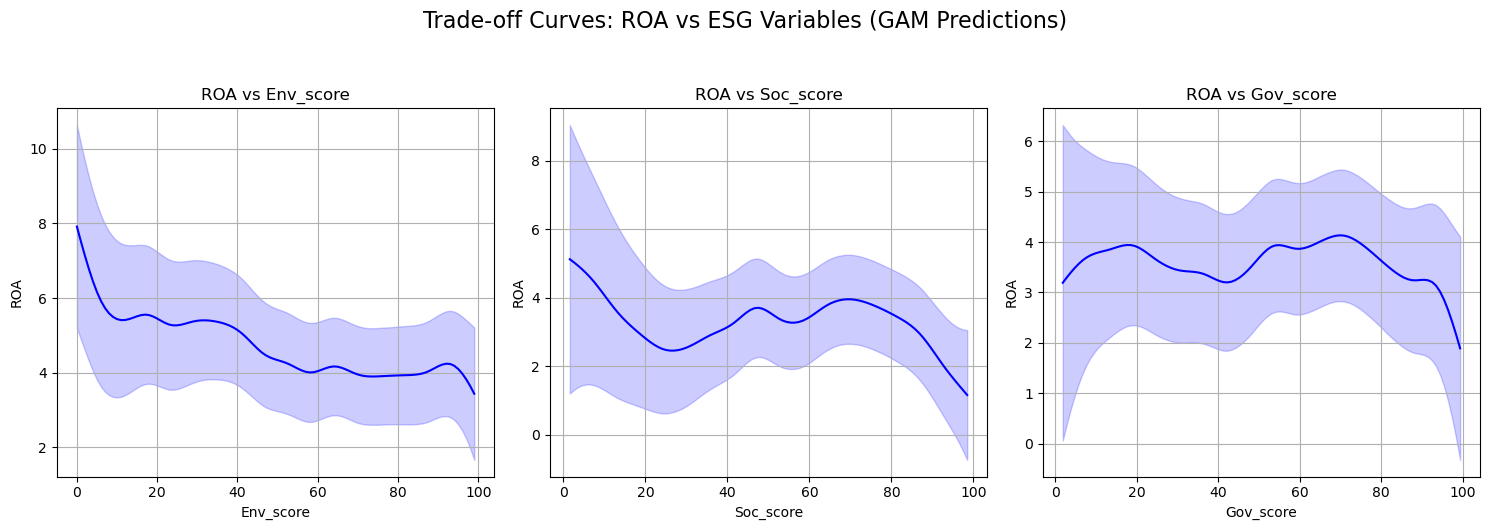

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define ESG predictors and financial ratio target
esg_predictors = ['Env_score', 'Soc_score', 'Gov_score']
target = 'ROA'  # Only one financial ratio target

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure (1 row, 3 columns for the 3 ESG variables)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex='col')
fig.suptitle('Trade-off Curves: ROA vs ESG Variables (GAM Predictions)', fontsize=16, y=1.05)

# Load the GAM model for ROA
model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
with open(model_path, 'rb') as file_handle:
    gam = pickle.load(file_handle)

# Clean data
df_clean = df.dropna(subset=esg_predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

# Reconstruct input feature matrix
X_num = df_clean[esg_predictors].values
X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])

# Get median values
X_baseline = np.median(X_train, axis=0)
feature_indices = {name: idx for idx, name in enumerate(esg_predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

# Loop over ESG predictors
for col_idx, esg_var in enumerate(esg_predictors):
    idx_esg = feature_indices[esg_var]

    # Grid for ESG variable
    esg_min, esg_max = X_train[:, idx_esg].min(), X_train[:, idx_esg].max()
    esg_grid = np.linspace(esg_min, esg_max, 100)

    # Prediction input: vary ESG variable, fix all else at median
    X_pred = np.tile(X_baseline, (100, 1))
    X_pred[:, idx_esg] = esg_grid

    # Predict ROA and confidence intervals
    roa_pred = gam.predict(X_pred)
    conf_int = gam.confidence_intervals(X_pred)

    # Plot in subplot
    ax = axes[col_idx]
    ax.plot(esg_grid, roa_pred, label='ROA', color='blue')
    ax.fill_between(esg_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
    ax.set_title(f'ROA vs {esg_var}')
    ax.set_xlabel(esg_var)
    ax.set_ylabel('ROA')
    ax.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.savefig('roa_trade_off.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()


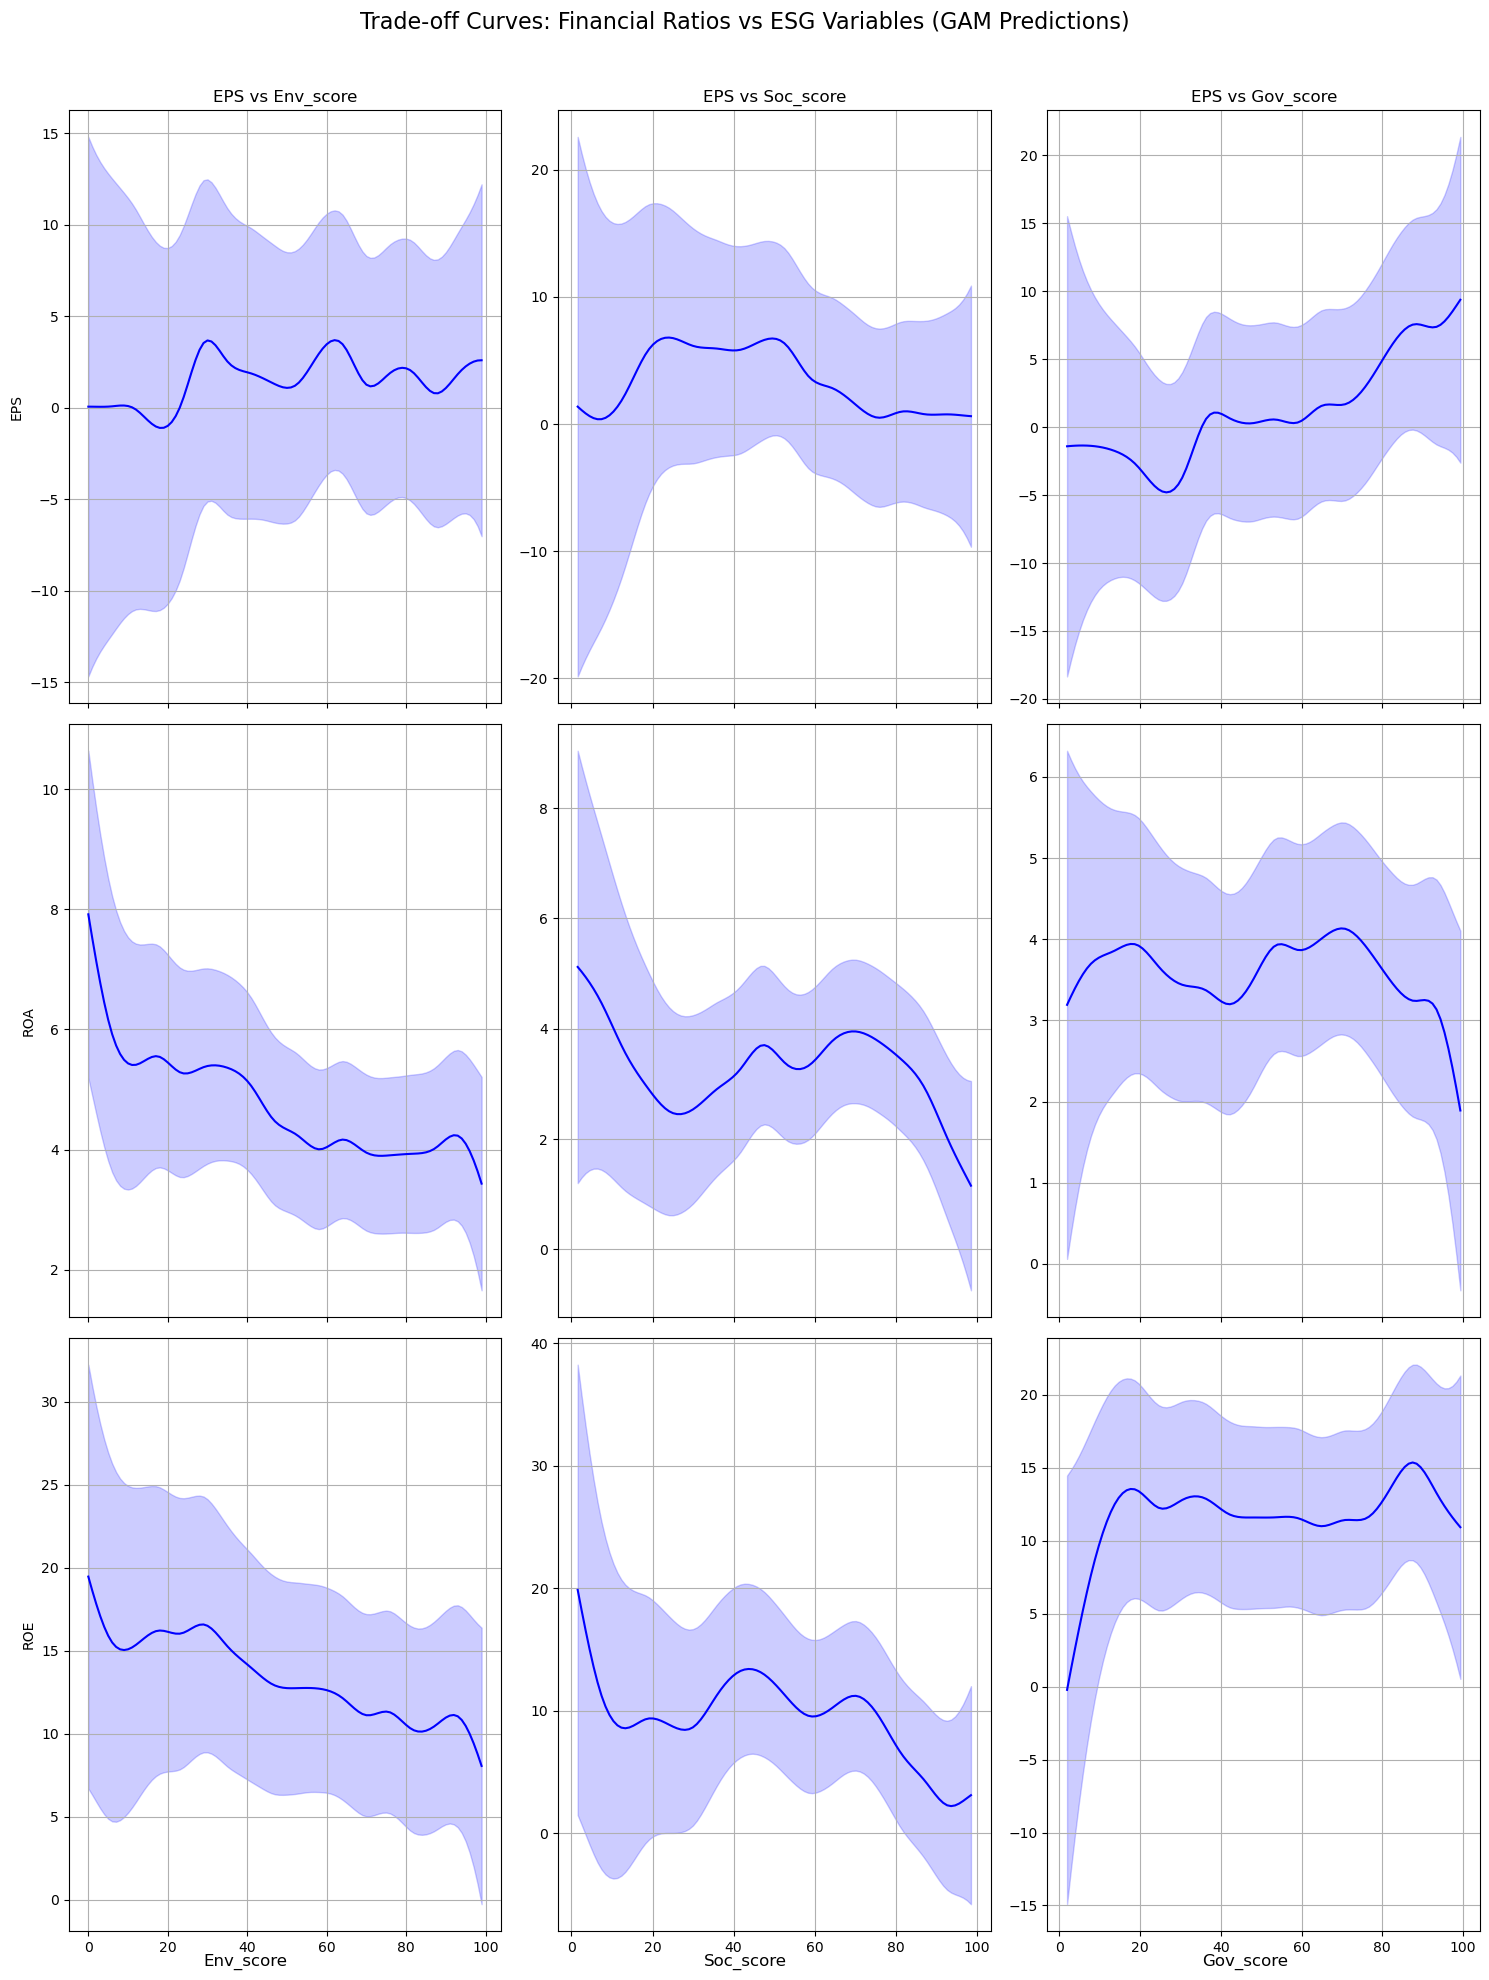

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
esg_targets = ['EPS', 'ROA', 'ROE']
predictors = ['Env_score', 'Soc_score', 'Gov_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: Financial Ratios vs ESG Variables (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Reconstruct input feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Get median values
    X_baseline = np.median(X_train, axis=0)
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Grid for current financial ratio
        fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Prediction input: vary current ratio, fix all else at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Predict ESG and confidence intervals
        esg_pred = gam.predict(X_pred)
        conf_int = gam.confidence_intervals(X_pred)

        # Plot in subplot
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=f'{target}', color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
        ax.set_title(f'{target} vs {fin_ratio}' if row_idx == 0 else "")
        if col_idx == 0:
            ax.set_ylabel(f'{target}')
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Add column labels (ESG predictors)
column_labels = predictors  # ['Env_score', 'Soc_score', 'Gov_score']
n_cols = len(column_labels)

for col_idx, label in enumerate(column_labels):
    # x = relative horizontal position (fraction of figure width)
    x_pos = (col_idx + 0.5) / n_cols
    fig.text(x_pos, 0.004, label, ha='center', va='center', fontsize=12)


# Adjust layout before adding suptitle
plt.tight_layout()

# Add space for the super title
fig.subplots_adjust(top=0.93)
fig.suptitle('Trade-off Curves: Financial Ratios vs ESG Variables (GAM Predictions)', fontsize=16)

plt.savefig('finance_tradeoff_curves_USA.pdf', format='pdf', bbox_inches='tight')

# Show the final plot
plt.show()


## Numerical

In [31]:
import numpy as np
import pickle
import os
import pandas as pd

# Define variables
esg_targets = ['EPS', 'ROA', 'ROE']
predicters = ['Env_score', 'Soc_score', 'Gov_score']
model_dir = 'saved_gam_models'

# Prepare clean dataset
df_clean = df.dropna(subset=predictors + esg_targets + ['Country_code', 'Industry_code', 'MCap_code']).copy()
X_num = df_clean[predictors].values
X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])
X_baseline = np.median(X_train, axis=0)

# Index lookup
feature_indices = {name: idx for idx, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

# Collect results
results = []

for target in esg_targets:
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    for predictor in predictors:
        idx = feature_indices[predictor]
        base_value = X_baseline[idx]
        delta = base_value * 0.01  # 1% change

        # Skip if base_value is 0 to avoid division by zero
        if base_value == 0:
            marginal_effect = np.nan
            esg_change = np.nan
        else:
            X_up = X_baseline.copy()
            X_up[idx] += delta
            X_down = X_baseline.copy()
            X_down[idx] -= delta

            # Predict
            esg_up = gam.predict([X_up])[0]
            esg_down = gam.predict([X_down])[0]

            # Central difference approximation
            marginal_effect = (esg_up - esg_down) / (2 * delta)
            esg_change = marginal_effect * delta

        results.append({
            'ESG Target': target,
            'Financial Ratio': predictor,
            'Base Value': base_value,
            'Marginal Effect (ΔESG/ΔRatio)': marginal_effect,
            'Predicted ESG Change for +1% Ratio': esg_change
        })

# Convert to DataFrame
df_tradeoffs = pd.DataFrame(results)

# Display
print(df_tradeoffs.round(4))


  ESG Target Financial Ratio  Base Value  Marginal Effect (ΔESG/ΔRatio)  \
0        EPS       Env_score      70.505                        -0.0922   
1        EPS       Soc_score      71.270                        -0.2543   
2        EPS       Gov_score      63.045                         0.2436   
3        ROA       Env_score      70.505                        -0.0282   
4        ROA       Soc_score      71.270                        -0.0194   
5        ROA       Gov_score      63.045                         0.0349   
6        ROE       Env_score      70.505                         0.0012   
7        ROE       Soc_score      71.270                        -0.1551   
8        ROE       Gov_score      63.045                        -0.0958   

   Predicted ESG Change for +1% Ratio  
0                             -0.0650  
1                             -0.1813  
2                              0.1536  
3                             -0.0199  
4                             -0.0138  
5        

# USA

In [55]:
df = pd.read_csv(r"C:file.csv")
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


### Add market capitalization category

In [58]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10,Large Cap
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09,Mid Cap
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09,Mid Cap
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09,Mid Cap
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10,Large Cap
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10,Large Cap
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11,Large Cap
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10,Large Cap


# ESG as target

## GAM


GAM Summary for Target: ESG_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    289.6632
Link Function:                     IdentityLink Log Likelihood:                                -27719.3468
Number of Samples:                         4585 AIC:                                            56020.0201
                                                AICc:                                           56059.5118
                                                GCV:                                              189.4041
                                                Scale:                                            167.9947
                                                Pseudo R-Squared:                                   0.5734
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\2451785711.py:66: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Env_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    262.5681
Link Function:                     IdentityLink Log Likelihood:                                -31265.3219
Number of Samples:                         4585 AIC:                                            63057.7799
                                                AICc:                                           63090.0598
                                                GCV:                                              406.2555
                                                Scale:                                            364.6047
                                                Pseudo R-Squared:                                   0.5555
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\2451785711.py:66: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Soc_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    316.1638
Link Function:                     IdentityLink Log Likelihood:                                -28698.3312
Number of Samples:                         4585 AIC:                                              58030.99
                                                AICc:                                           58078.2897
                                                GCV:                                              237.3646
                                                Scale:                                            208.0966
                                                Pseudo R-Squared:                                   0.5633
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\2451785711.py:66: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: Gov_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    235.6838
Link Function:                     IdentityLink Log Likelihood:                                -30001.0816
Number of Samples:                         4585 AIC:                                            60475.5308
                                                AICc:                                           60501.4115
                                                GCV:                                              304.6785
                                                Scale:                                            276.6237
                                                Pseudo R-Squared:                                   0.4024
Fe

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\2451785711.py:66: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ESG_Comb_score
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    262.5681
Link Function:                     IdentityLink Log Likelihood:                                -28192.3982
Number of Samples:                         4585 AIC:                                            56911.9325
                                                AICc:                                           56944.2125
                                                GCV:                                              207.5833
                                                Scale:                                            186.3011
                                                Pseudo R-Squared:                                   0.46

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\2451785711.py:66: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


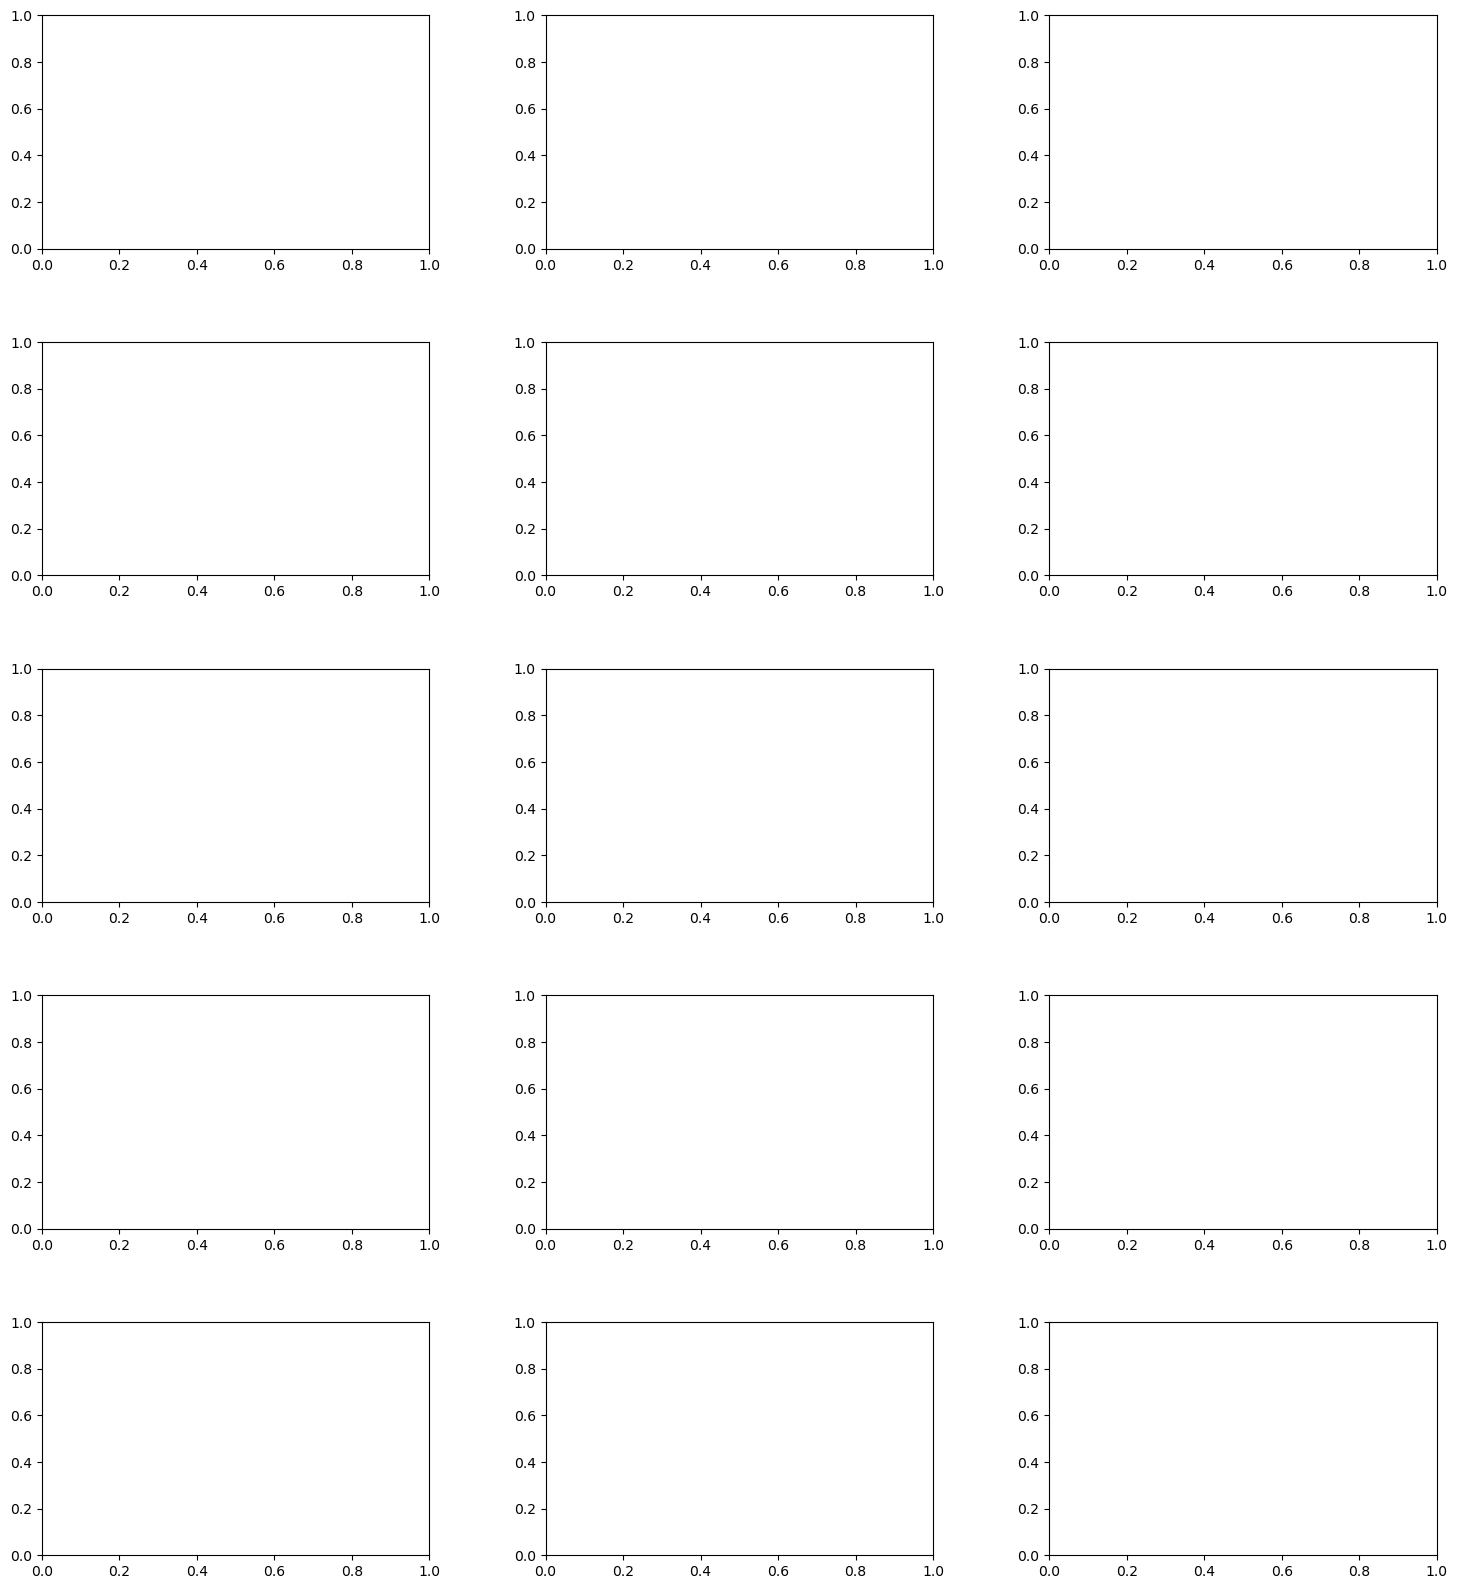

In [65]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Define optimal lambda values
lambda_dict = {
    'ESG_score': [0.015848931924611134] * 5,
    'Env_score': [0.0630957344480193] * 5,
    'Soc_score': [0.003981071705534973] * 5,
    'Gov_score': [0.25118864315095796] * 5,
    'ESG_Comb_score': [0.0630957344480193] * 5
}

# Create 5x3 figure (5 ESG targets × 3 predictors)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20), sharey=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop over ESG targets
for row, target in enumerate(esg_targets):
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Retrieve correct lambda list
    lam = lambda_dict[target]

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=lam[0]) + 
        s(1, lam=lam[1]) + 
        s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + 
        f(4, lam=lam[4]) +

        te(3, 4, lam=lam[0]) +
        te(0, 1, lam=lam[1]) +
        te(0, 2, lam=lam[2]) +
        te(1, 2, lam=lam[3]) +

        te(0, 3, lam=lam[4]) +
        te(0, 4, lam=lam[0]) +
        te(1, 3, lam=lam[1]) +
        te(1, 4, lam=lam[2]) +
        te(2, 3, lam=lam[3]) +
        te(2, 4, lam=lam[4])
    ).fit(X, y)

    # Print summary
    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # # Loop over predictors (columns)
    # for col, predictor in enumerate(predictors):
    #     ax = axes[row, col]

    #     # Generate grid manually to avoid category domain issues
    #     grid_vals = np.linspace(df_clean[predictor].min(), df_clean[predictor].max(), 100)
    #     X_grid = np.zeros((100, 5))
    #     X_grid[:, col] = grid_vals

    #     # Fill in average numeric values for other predictors
    #     for i in range(3):
    #         if i != col:
    #             X_grid[:, i] = df_clean[predictors[i]].mean()

    #     # Fill in the most common valid category codes for categorical features
    #     X_grid[:, 3] = df_clean['Industry_code'].mode()[0]
    #     X_grid[:, 4] = df_clean['MCap_code'].mode()[0]

    #     # Compute partial dependence
    #     pdep, confi = gam.partial_dependence(term=col, X=X_grid, width=0.95)

    #     ax.plot(grid_vals, pdep, label='Partial Dependence')
    #     ax.plot(grid_vals, confi[:, 0], ls='--', label='95% CI Lower', alpha=0.7)
    #     ax.plot(grid_vals, confi[:, 1], ls='--', label='95% CI Upper', alpha=0.7)

    #     ax.set_title(f'{target} ~ {predictor}', fontsize=10)
    #     ax.set_xlabel(predictor)
    #     if col == 0:
    #         ax.set_ylabel(target)
    #     ax.grid(True)


# # Shared legend
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=10)

# # Save or show figure
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# # plt.savefig('partial_dependence_interaction2_ESG_USA.pdf', dpi=300)
# plt.show()

In [69]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build GAM model
    gam = LinearGAM(
        s(0, lam=lam[0]) + 
        s(1, lam=lam[1]) + 
        s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + 
        f(4, lam=lam[4]) +

        te(3, 4, lam=lam[0]) +
        te(0, 1, lam=lam[1]) +
        te(0, 2, lam=lam[2]) +
        te(1, 2, lam=lam[3]) +

        te(0, 3, lam=lam[4]) +
        te(0, 4, lam=lam[0]) +
        te(1, 3, lam=lam[1]) +
        te(1, 4, lam=lam[2]) +
        te(2, 3, lam=lam[3]) +
        te(2, 4, lam=lam[4])
    ).fit(X, y)

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")

✅ Saved model for ESG_score to saved_gam_models\gam_model_ESG_score.pkl
✅ Saved model for Env_score to saved_gam_models\gam_model_Env_score.pkl
✅ Saved model for Soc_score to saved_gam_models\gam_model_Soc_score.pkl
✅ Saved model for Gov_score to saved_gam_models\gam_model_Gov_score.pkl
✅ Saved model for ESG_Comb_score to saved_gam_models\gam_model_ESG_Comb_score.pkl


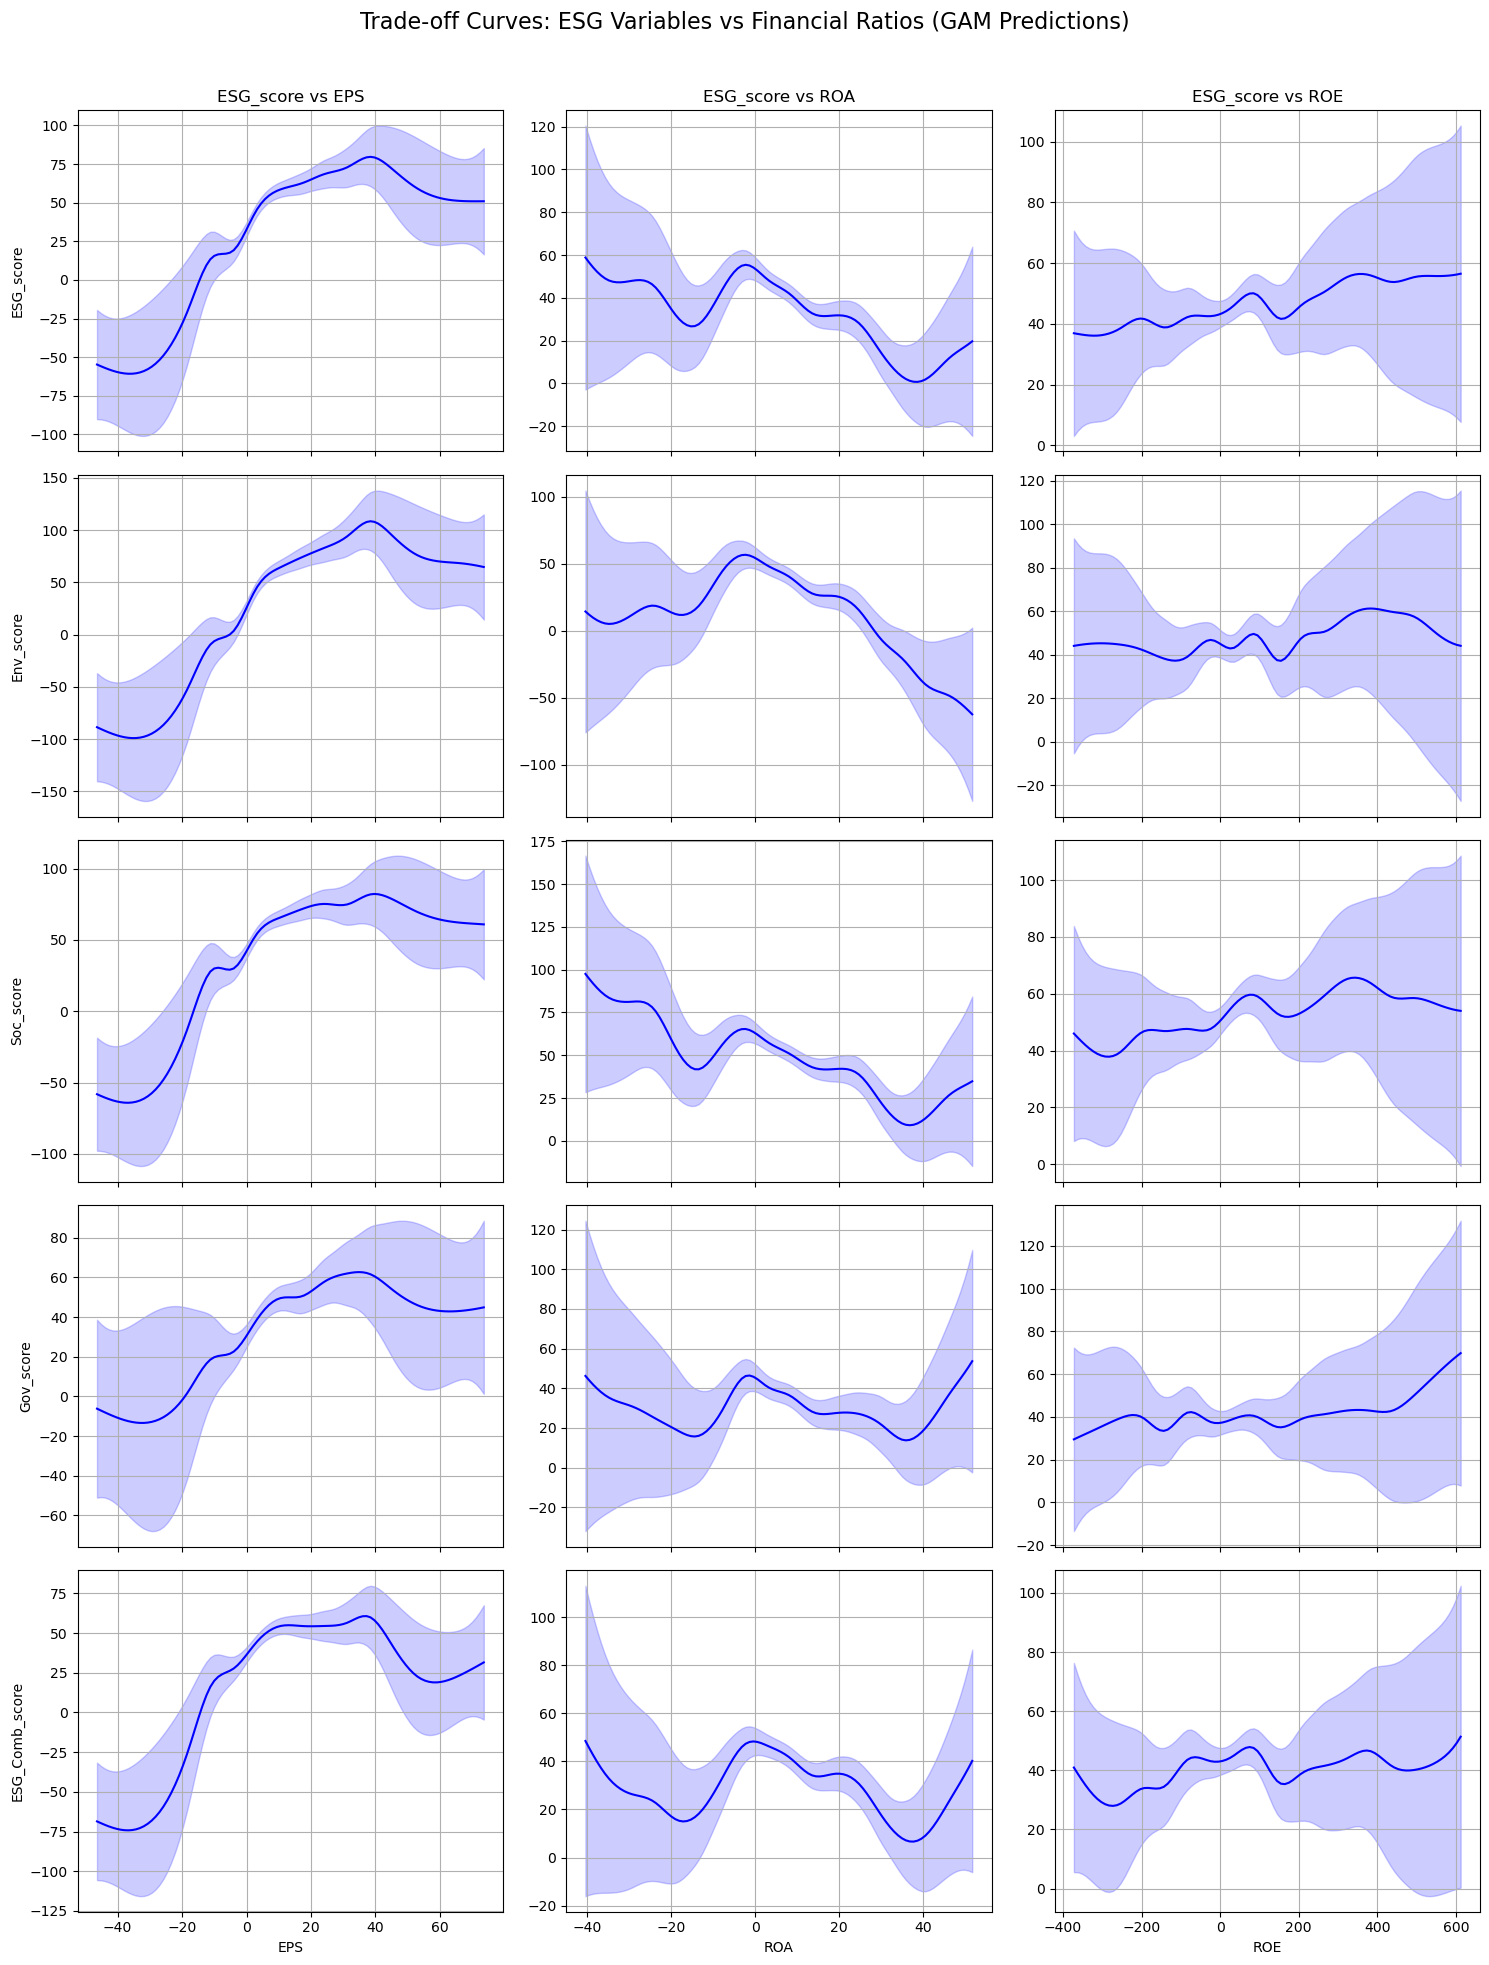

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Reconstruct input feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Get median values
    X_baseline = np.median(X_train, axis=0)
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Industry_code', 'MCap_code'])}

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Grid for current financial ratio
        fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Prediction input: vary current ratio, fix all else at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Predict ESG and confidence intervals
        esg_pred = gam.predict(X_pred)
        conf_int = gam.confidence_intervals(X_pred)

        # Plot in subplot
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=f'{target}', color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
        ax.set_title(f'{target} vs {fin_ratio}' if row_idx == 0 else "")
        if col_idx == 0:
            ax.set_ylabel(f'{target}')
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Adjust layout before adding suptitle
plt.tight_layout()

# Add space for the super title
fig.subplots_adjust(top=0.93)
fig.suptitle('Trade-off Curves: ESG Variables vs Financial Ratios (GAM Predictions)', fontsize=16)

plt.savefig('esg_tradeoff_curves_USA.pdf', format='pdf', bbox_inches='tight')

# Show the final plot
plt.show()

In [77]:
import numpy as np
import pickle
import os
import pandas as pd

# Define variables
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
model_dir = 'saved_gam_models'

# Prepare clean dataset
df_clean = df.dropna(subset=predictors + esg_targets + ['Industry_code', 'MCap_code']).copy()
X_num = df_clean[predictors].values
X_cat = df_clean[['Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])
X_baseline = np.median(X_train, axis=0)

# Index lookup
feature_indices = {name: idx for idx, name in enumerate(predictors + ['Industry_code', 'MCap_code'])}

# Collect results
results = []

for target in esg_targets:
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    for predictor in predictors:
        idx = feature_indices[predictor]
        base_value = X_baseline[idx]
        delta = base_value * 0.01  # 1% change

        # Skip if base_value is 0 to avoid division by zero
        if base_value == 0:
            marginal_effect = np.nan
            esg_change = np.nan
        else:
            X_up = X_baseline.copy()
            X_up[idx] += delta
            X_down = X_baseline.copy()
            X_down[idx] -= delta

            # Predict
            esg_up = gam.predict([X_up])[0]
            esg_down = gam.predict([X_down])[0]

            # Central difference approximation
            marginal_effect = (esg_up - esg_down) / (2 * delta)
            esg_change = marginal_effect * delta

        results.append({
            'ESG Target': target,
            'Financial Ratio': predictor,
            'Base Value': base_value,
            'Marginal Effect (ΔESG/ΔRatio)': marginal_effect,
            'Predicted ESG Change for +1% Ratio': esg_change
        })

# Convert to DataFrame
df_tradeoffs = pd.DataFrame(results)

# Display
print(df_tradeoffs.round(4))

        ESG Target Financial Ratio  Base Value  Marginal Effect (ΔESG/ΔRatio)  \
0        ESG_score             EPS        2.85                         3.5833   
1        ESG_score             ROA        6.40                        -1.1711   
2        ESG_score             ROE       17.00                         0.0796   
3        Env_score             EPS        2.85                         5.3207   
4        Env_score             ROA        6.40                        -1.5412   
5        Env_score             ROE       17.00                        -0.0745   
6        Soc_score             EPS        2.85                         3.3237   
7        Soc_score             ROA        6.40                        -1.1908   
8        Soc_score             ROE       17.00                         0.1654   
9        Gov_score             EPS        2.85                         2.4526   
10       Gov_score             ROA        6.40                        -0.6563   
11       Gov_score          

## Target Financial ratio

In [80]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# Define ESG targets and predictors
esg_targets = ['EPS', 'ROA', 'ROE']
predictors = ['Env_score', 'Soc_score', 'Gov_score']

# Convert categorical variables
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Define corrected penalties (only 15 per target, matching the 15 terms used in the model)
penalties = {
    'EPS': [
        [1.0], [1.0], [1.0],        # s(0), s(1), s(2)
        [1.0], [1.0],               # f(3), f(4)
        [1.0, 1.0],                 # te(3, 4)
        [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],  # te(0,1), te(0,2), te(1,2)
        [1.0, 1.0], [1.0, 1.0],     # te(0,3), te(0,4)
        [1.0, 1.0], [1.0, 1.0],     # te(1,3), te(1,4)
        [1.0, 1.0], [1.0, 1.0]      # te(2,3), te(2,4)
    ],
    'ROA': [
        [1.0], [1.0], [1.0],
        [1.0], [1.0],
        [1.0, 1.0],
        [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
        [1.0, 1.0], [1.0, 1.0],
        [1.0, 1.0], [1.0, 1.0],
        [1.0, 1.0], [1.0, 1.0]
    ],
    'ROE': [
        [3.981], [3.981], [3.981],
        [3.981], [3.981],
        [3.981, 3.981],
        [3.981, 3.981], [3.981, 3.981], [3.981, 3.981],
        [3.981, 3.981], [3.981, 3.981],
        [3.981, 3.981], [3.981, 3.981],
        [3.981, 3.981], [3.981, 3.981]
    ]
}

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values.astype(int)
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    lam = penalties[target]

    # Build and fit GAM with fixed penalties
    gam = LinearGAM(
        s(0, lam=lam[0]) + s(1, lam=lam[1]) + s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + f(4, lam=lam[4]) +
        te(3, 4, lam=lam[5]) +
        te(0, 1, lam=lam[6]) + te(0, 2, lam=lam[7]) + te(1, 2, lam=lam[8]) +
        te(0, 3, lam=lam[9]) + te(0, 4, lam=lam[10]) +
        te(1, 3, lam=lam[11]) + te(1, 4, lam=lam[12]) +
        te(2, 3, lam=lam[13]) + te(2, 4, lam=lam[14])
    ).fit(X, y)

    print(f"\nGAM Summary for Target: {target}")
    gam.summary()

    # # Plot smooth effects of numeric variables
    # for i, predictor in enumerate(predictors):
    #     plt.figure()
    #     XX = gam.generate_X_grid(term=i)
    #     plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    #     plt.title(f'{target} ~ {predictor}')
    #     plt.xlabel(predictor)
    #     plt.ylabel(f'Partial effect on {target}')
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.show()



GAM Summary for Target: EPS
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    318.6952
Link Function:                     IdentityLink Log Likelihood:                                -15060.5305
Number of Samples:                         4585 AIC:                                            30760.4514
                                                AICc:                                           30808.5365
                                                GCV:                                               11.6208
                                                Scale:                                             10.1765
                                                Pseudo R-Squared:                                   0.4671
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\3369159042.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ROA
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    318.6952
Link Function:                     IdentityLink Log Likelihood:                                -18177.0587
Number of Samples:                         4585 AIC:                                            36993.5078
                                                AICc:                                           37041.5929
                                                GCV:                                               23.4671
                                                Scale:                                             20.5505
                                                Pseudo R-Squared:                                   0.5315
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\3369159042.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()



GAM Summary for Target: ROE
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    246.5693
Link Function:                     IdentityLink Log Likelihood:                                -34925.3361
Number of Samples:                         4585 AIC:                                            70345.8108
                                                AICc:                                           70374.1927
                                                GCV:                                              896.9951
                                                Scale:                                            810.6053
                                                Pseudo R-Squared:                                   0.3477
Feature 

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_5172\3369159042.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [86]:
import os
import pickle
import numpy as np
# from pygam import LinearGAM, s, f, te  # Ensure this is not overwritten!

# Directory to save models
model_dir = 'saved_gam_models'
os.makedirs(model_dir, exist_ok=True)

# Loop over ESG targets
for target in esg_targets:
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Create feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])
    y = df_clean[target].values

    # Build and fit GAM with fixed penalties
    gam = LinearGAM(
        s(0, lam=lam[0]) + s(1, lam=lam[1]) + s(2, lam=lam[2]) +
        f(3, lam=lam[3]) + f(4, lam=lam[4]) +
        te(3, 4, lam=lam[5]) +
        te(0, 1, lam=lam[6]) + te(0, 2, lam=lam[7]) + te(1, 2, lam=lam[8]) +
        te(0, 3, lam=lam[9]) + te(0, 4, lam=lam[10]) +
        te(1, 3, lam=lam[11]) + te(1, 4, lam=lam[12]) +
        te(2, 3, lam=lam[13]) + te(2, 4, lam=lam[14])
    ).fit(X, y)

    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:  # renamed from `f` to `file_handle`
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model for {target} to {model_path}")

✅ Saved model for EPS to saved_gam_models\gam_model_EPS.pkl
✅ Saved model for ROA to saved_gam_models\gam_model_ROA.pkl
✅ Saved model for ROE to saved_gam_models\gam_model_ROE.pkl


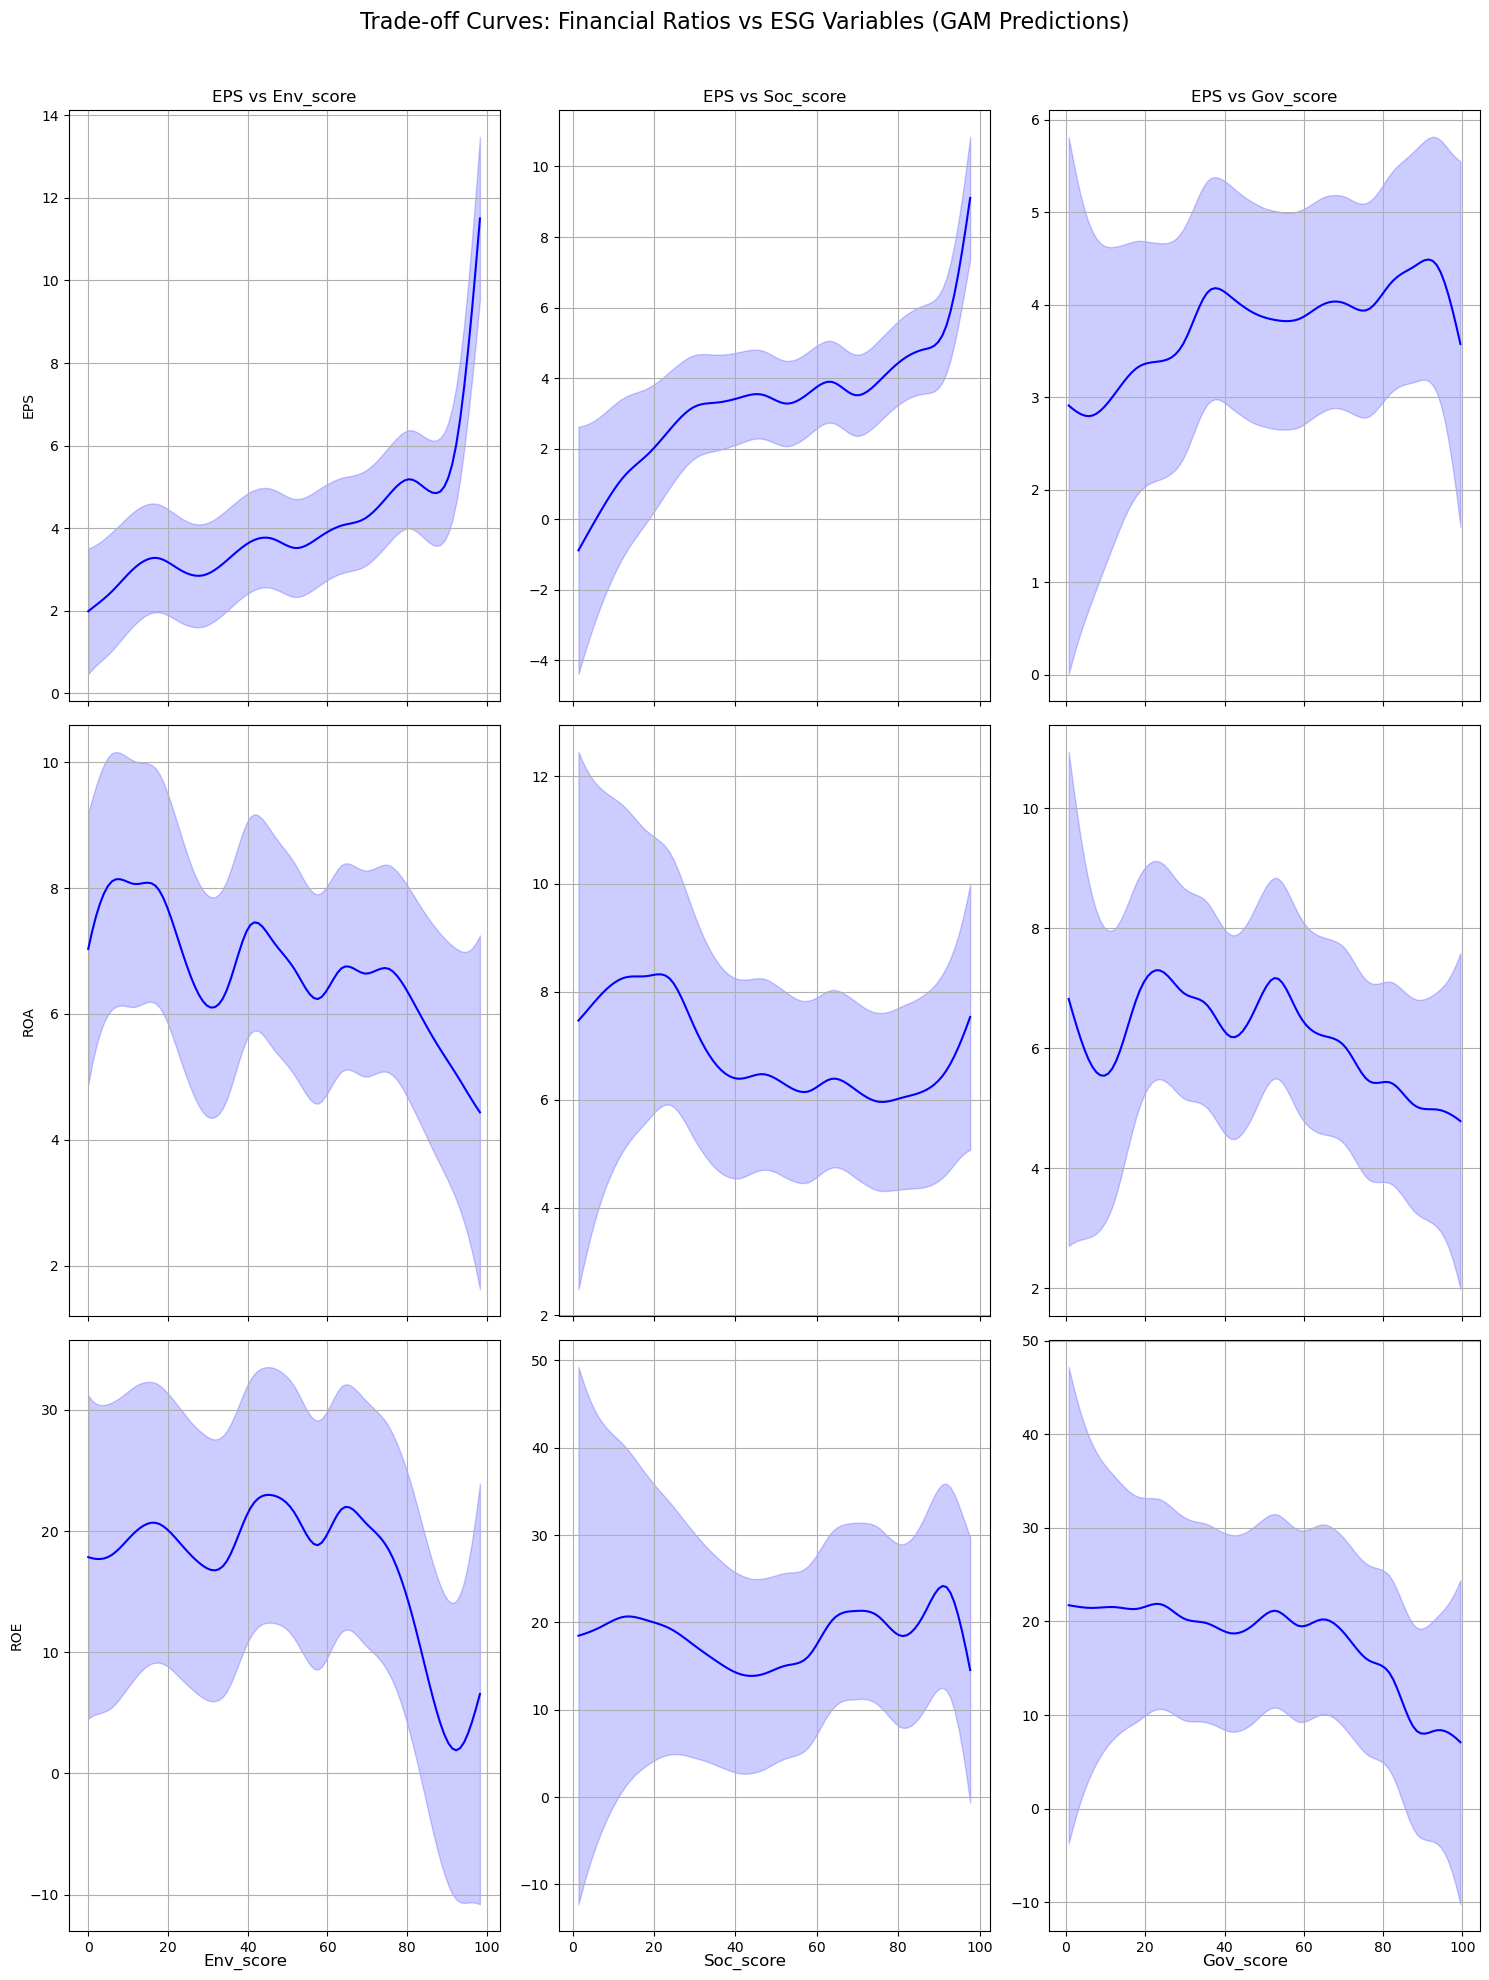

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# Define predictors and ESG targets
esg_targets = ['EPS', 'ROA', 'ROE']
predictors = ['Env_score', 'Soc_score', 'Gov_score']

# Directory where models are saved
model_dir = 'saved_gam_models'

# Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20), sharex='col')
fig.suptitle('Trade-off Curves: Financial Ratios vs ESG Variables (GAM Predictions)', fontsize=16, y=0.92)

# Loop over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load the GAM model for the current ESG target
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Clean data
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Reconstruct input feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X_train = np.hstack([X_num, X_cat])

    # Get median values
    X_baseline = np.median(X_train, axis=0)
    feature_indices = {name: idx for idx, name in enumerate(predictors + ['Industry_code', 'MCap_code'])}

    # Loop over financial ratios (columns)
    for col_idx, fin_ratio in enumerate(predictors):
        idx_fin = feature_indices[fin_ratio]

        # Grid for current financial ratio
        fin_min, fin_max = X_train[:, idx_fin].min(), X_train[:, idx_fin].max()
        fin_grid = np.linspace(fin_min, fin_max, 100)

        # Prediction input: vary current ratio, fix all else at median
        X_pred = np.tile(X_baseline, (100, 1))
        X_pred[:, idx_fin] = fin_grid

        # Predict ESG and confidence intervals
        esg_pred = gam.predict(X_pred)
        conf_int = gam.confidence_intervals(X_pred)

        # Plot in subplot
        ax = axes[row_idx, col_idx]
        ax.plot(fin_grid, esg_pred, label=f'{target}', color='blue')
        ax.fill_between(fin_grid, conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.2)
        ax.set_title(f'{target} vs {fin_ratio}' if row_idx == 0 else "")
        if col_idx == 0:
            ax.set_ylabel(f'{target}')
        if row_idx == 4:
            ax.set_xlabel(fin_ratio)
        ax.grid(True)

# Add column labels (ESG predictors)
column_labels = predictors  # ['Env_score', 'Soc_score', 'Gov_score']
n_cols = len(column_labels)

for col_idx, label in enumerate(column_labels):
    # x = relative horizontal position (fraction of figure width)
    x_pos = (col_idx + 0.5) / n_cols
    fig.text(x_pos, 0.004, label, ha='center', va='center', fontsize=12)


# Adjust layout before adding suptitle
plt.tight_layout()

# Add space for the super title
fig.subplots_adjust(top=0.93)
fig.suptitle('Trade-off Curves: Financial Ratios vs ESG Variables (GAM Predictions)', fontsize=16)

plt.savefig('finance_tradeoff_curves_real_USA.pdf', format='pdf', bbox_inches='tight')

# Show the final plot
plt.show()


In [94]:
import numpy as np
import pickle
import os
import pandas as pd

# Define variables
esg_targets = ['EPS', 'ROA', 'ROE']
predicters = ['Env_score', 'Soc_score', 'Gov_score']
model_dir = 'saved_gam_models'

# Prepare clean dataset
df_clean = df.dropna(subset=predictors + esg_targets + ['Industry_code', 'MCap_code']).copy()
X_num = df_clean[predictors].values
X_cat = df_clean[['Industry_code', 'MCap_code']].values
X_train = np.hstack([X_num, X_cat])
X_baseline = np.median(X_train, axis=0)

# Index lookup
feature_indices = {name: idx for idx, name in enumerate(predictors + ['Industry_code', 'MCap_code'])}

# Collect results
results = []

for target in esg_targets:
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    for predictor in predictors:
        idx = feature_indices[predictor]
        base_value = X_baseline[idx]
        delta = base_value * 0.01  # 1% change

        # Skip if base_value is 0 to avoid division by zero
        if base_value == 0:
            marginal_effect = np.nan
            esg_change = np.nan
        else:
            X_up = X_baseline.copy()
            X_up[idx] += delta
            X_down = X_baseline.copy()
            X_down[idx] -= delta

            # Predict
            esg_up = gam.predict([X_up])[0]
            esg_down = gam.predict([X_down])[0]

            # Central difference approximation
            marginal_effect = (esg_up - esg_down) / (2 * delta)
            esg_change = marginal_effect * delta

        results.append({
            'Financial ratio': target,
            'ESG variable': predictor,
            'Base Value': base_value,
            'Marginal Effect (ΔESG/ΔRatio)': marginal_effect,
            'Predicted ESG Change for +1% Ratio': esg_change
        })

# Convert to DataFrame
df_tradeoffs = pd.DataFrame(results)

# Display
print(df_tradeoffs.round(4))


  Financial ratio ESG variable  Base Value  Marginal Effect (ΔESG/ΔRatio)  \
0             EPS    Env_score       59.74                         0.0577   
1             EPS    Soc_score       62.73                         0.0151   
2             EPS    Gov_score       60.90                         0.0280   
3             ROA    Env_score       59.74                         0.0956   
4             ROA    Soc_score       62.73                         0.0338   
5             ROA    Gov_score       60.90                        -0.0694   
6             ROE    Env_score       59.74                         0.5795   
7             ROE    Soc_score       62.73                         0.6918   
8             ROE    Gov_score       60.90                         0.1580   

   Predicted ESG Change for +1% Ratio  
0                              0.0345  
1                              0.0095  
2                              0.0171  
3                              0.0571  
4                            